# data source

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import time
from IPython.display import Image, display
os.getcwd()
#getting the current working directory

'C:\\Users\\Mukul\\Desktop\\fruad detection project\\course code'

# Checking the directories

In [21]:
ls# displaying all the files in the directory

 Volume in drive C is Windows-SSD
 Volume Serial Number is B6F0-3E18

 Directory of C:\Users\Mukul\Desktop\fruad detection project\course code

23-Oct-23  03:02 PM    <DIR>          .
22-Oct-23  05:02 PM    <DIR>          ..
23-Oct-23  01:16 PM    <DIR>          .ipynb_checkpoints
23-Oct-23  09:19 AM             3,103 credit fraud a brief intoduction.md
20-Jul-22  09:51 AM             1,298 Data Dictionary.txt
22-Oct-23  05:43 PM             3,957 decision_tree.html
20-Jul-22  01:09 PM       493,534,783 Fraud.csv
23-Oct-23  03:02 PM         1,338,690 fraud_detection.ipynb
23-Oct-23  01:41 PM            46,799 fraud_detection_model.png
23-Oct-23  02:33 PM    <DIR>          helper files
23-Oct-23  02:20 PM    <DIR>          images
23-Oct-23  09:20 AM             4,632 intoduction to cyber crime.md
23-Oct-23  11:06 AM    <DIR>          latex pdfs
23-Oct-23  08:12 AM             4,216 Theory for decision tree.ipynb
23-Oct-23  01:28 PM             2,913 Untitled.ipynb
23-Oct-23  09:26 AM   

# Creating the classes

In [46]:
import numpy as np
import pandas as pd
import os
from IPython.display import display, Image

class Eda:
    def __init__(self, data_path, dictionary_path, screenshot_path):
        self.data = None
        self.data_dictionary = None
        self.screenshot_path = screenshot_path
        self.load_data(data_path)
        self.load_data_dictionary(dictionary_path)

    def load_data(self, data_path):
        if os.path.exists(data_path):
            self.data = pd.read_csv(data_path)
            print(f'Data loaded from {data_path}')
        else:
            print(f'File {data_path} not found.')

    def load_data_dictionary(self, dictionary_path):
        if os.path.exists(dictionary_path):
            with open(dictionary_path, "r") as context_file:
                self.data_dictionary = context_file.read()
            print('Data dictionary loaded.')
        else:
            print(f'File {dictionary_path} not found.')

    def display_screenshot(self):
        if os.path.exists(self.screenshot_path):
            display(Image(self.screenshot_path))
        else:
            print(f'Screenshot not found at {self.screenshot_path}.')

    def display_dictionary(self):
        if self.data_dictionary is not None:
            print(self.data_dictionary)
        else:
            print("Data dictionary is not available.")

    def explore_data(self):
        if self.data is not None:
            print(self.data.head(10).to_string(index=False))
            print("*********************************")
            print("all the columns")
            print("**************************************")
            print(self.data.columns)
            print("*********************************")
            print("printing the shape of the dataframe")
            print("**************************************")
            print(self.data.shape)
            print("********************************")
            print("getting the info of the data frame")
            print("**************************************")
            print(self.data.info())
            print("*********************************")
            print("checking for null values")
            print("**************************************")
            print(self.data.isnull().sum())
            print("**************************************")
        else:
            print("No data available for exploration.")

    def find_categorical_columns(self):
        if self.data is not None:
            num_cols = self.data._get_numeric_data().columns
            cate_cols = list(set(self.data.columns) - set(num_cols))
            return cate_cols
        else:
            return []

    def count_unique_values(self):
        if self.data is not None:
            for column in self.data.columns:
                print(f'{column} - Unique values: {self.data[column].nunique()}')
        else:
            print("No data available to count unique values.")
if __name__ == "__main__":
    eda = Eda(
        data_path="Fraud.csv",
        dictionary_path="Data Dictionary.txt",
        screenshot_path="images\datasetimage.png"
    )
    print("**************************************")
    print("**************************************")
    print("**********loading the data************")
    eda.explore_data()
    print("**************************************")

# Since the outputs are too long in one cell multiple __main__ are created for better viewing

# Calling with the objects

In [43]:
if __name__ == "__main__":
    eda = Eda(
        data_path="Fraud.csv",
        dictionary_path="Data Dictionary.txt",
        screenshot_path="images\datasetimage.png"
    )
    print("**************************************")
    print("**************************************")
    print("**********loading the data************")
    eda.explore_data()
    print("**************************************")

Data loaded from Fraud.csv
Data dictionary loaded.
**************************************
**************************************
**********loading the data************
 step     type   amount    nameOrig  oldbalanceOrg  newbalanceOrig    nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud
    1  PAYMENT  9839.64 C1231006815      170136.00       160296.36 M1979787155             0.0            0.00        0               0
    1  PAYMENT  1864.28 C1666544295       21249.00        19384.72 M2044282225             0.0            0.00        0               0
    1 TRANSFER   181.00 C1305486145         181.00            0.00  C553264065             0.0            0.00        1               0
    1 CASH_OUT   181.00  C840083671         181.00            0.00   C38997010         21182.0            0.00        1               0
    1  PAYMENT 11668.14 C2048537720       41554.00        29885.86 M1230701703             0.0            0.00        0               0
    1  PAYMENT  

Data loaded from Fraud.csv
Data dictionary loaded.
**************************************
loading the categorical variables
**************************************

Categorical Columns: ['nameDest', 'type', 'nameOrig']
**************************************
getting the number of unique values
**************************************
step - Unique values: 743
type - Unique values: 5
amount - Unique values: 5316900
nameOrig - Unique values: 6353307
oldbalanceOrg - Unique values: 1845844
newbalanceOrig - Unique values: 2682586
nameDest - Unique values: 2722362
oldbalanceDest - Unique values: 3614697
newbalanceDest - Unique values: 3555499
isFraud - Unique values: 2
isFlaggedFraud - Unique values: 2
**************************************
looking at the screenshot of the CSV file
**************************************


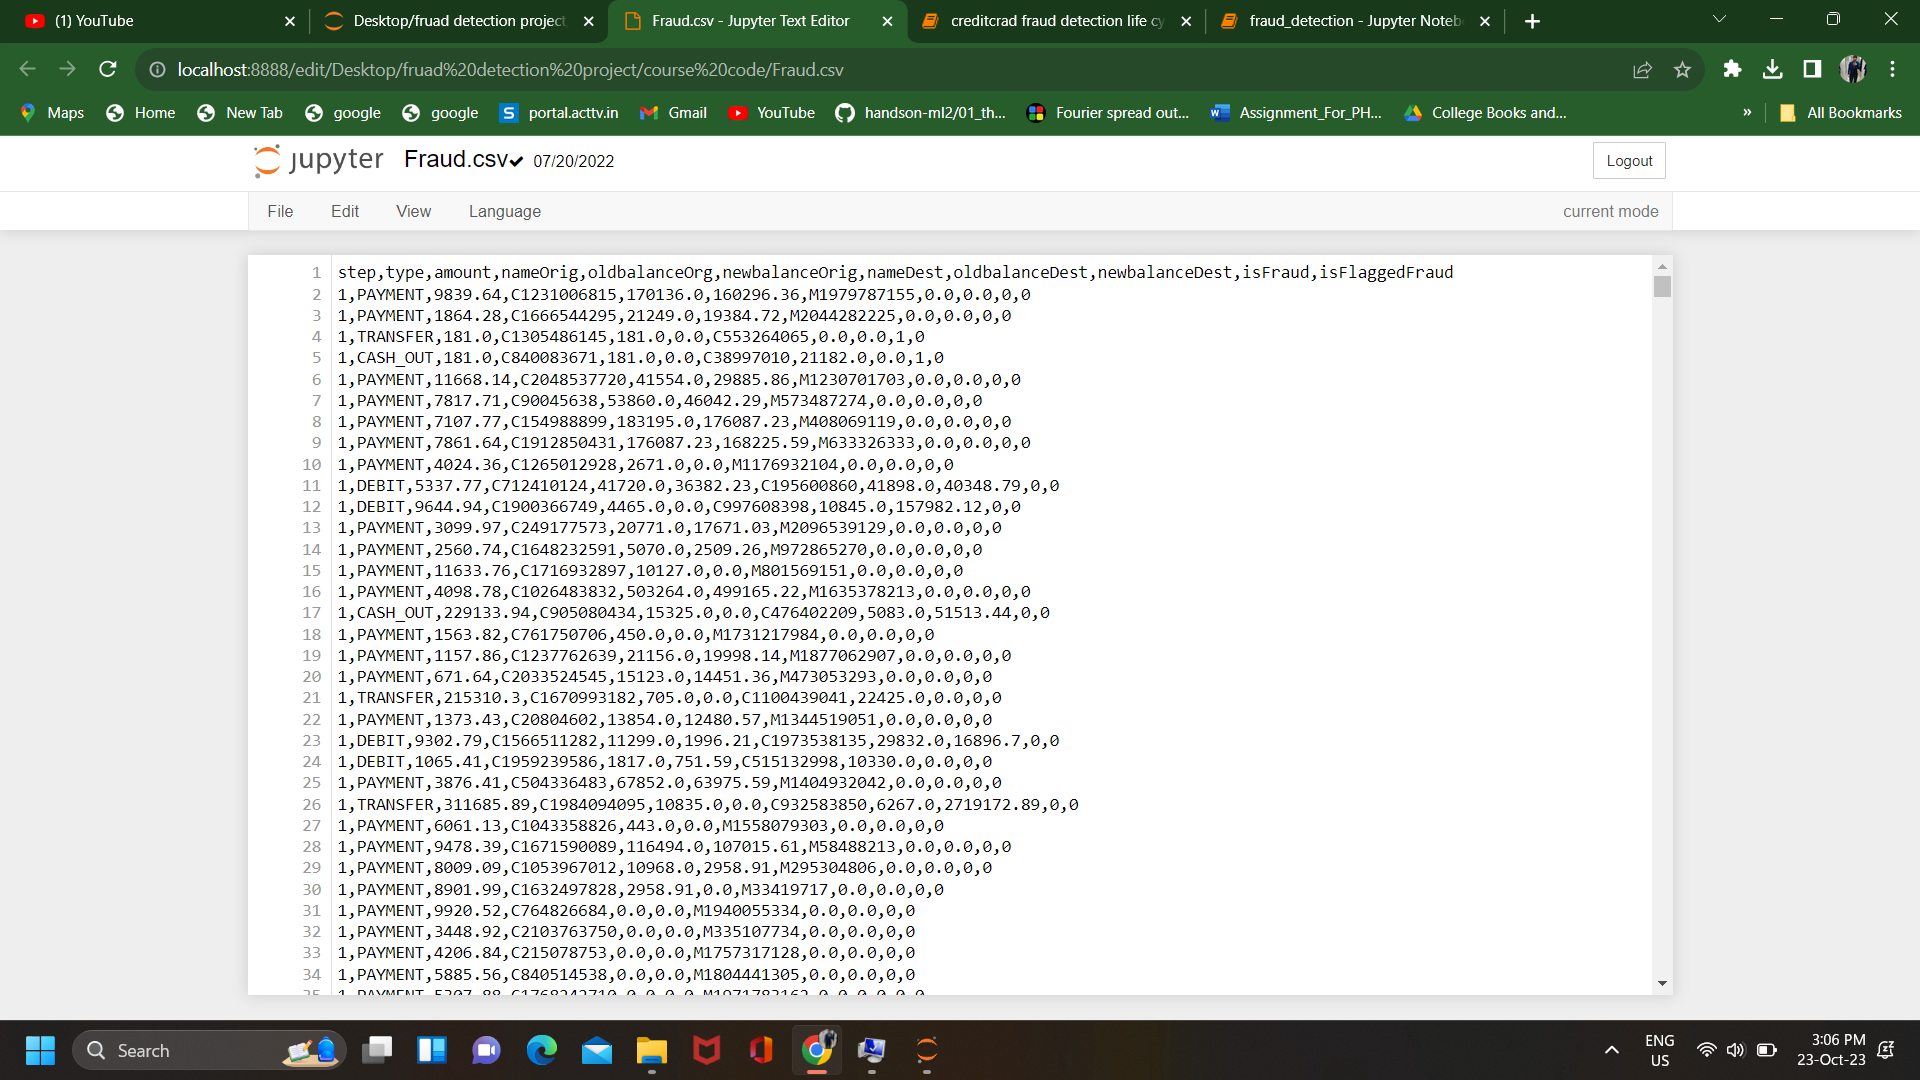

**************************************
looking at the data dictionary provided with the CSV file
**************************************
step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fra

In [45]:
if __name__ == "__main__":
    eda = Eda(
        data_path="Fraud.csv",
        dictionary_path="Data Dictionary.txt",
        screenshot_path="images\datasetimage.png"
    )
    print("**************************************")
    print("loading the categorical variables")
    print("**************************************")
    print("\nCategorical Columns:", eda.find_categorical_columns())
    print("**************************************")
    print("getting the number of unique values")
    print("**************************************")
    eda.count_unique_values()
    print("**************************************")
    print("looking at the screenshot of the CSV file")
    print("**************************************")
    eda.display_screenshot()
    print("**************************************")
    print("looking at the data dictionary provided with the CSV file")
    print("**************************************")
    eda.display_dictionary()
    print("**************************************")


there are indeed 11 columns in the csv file the Business context should be corrected

number of rows = 6362620 and number of columns = 11

## types of columns

### here 1 step indicate 1 hour in real time there are 743 steps which aprox indicate a moth of transaction history 

In [114]:
class Visualization:
    def __init__(self, data_path):
        self.data = None
        self.load_data(data_path)
    def load_data(self, data_path):
        if os.path.exists(data_path):
            self.data = pd.read_csv(data_path)
            print(f'Data loaded from {data_path}')
        else:
            print(f'File {data_path} not found.')
    def bar_graph(self, feature):
        if self.data is not None:
            self.data[feature].value_counts().plot(kind="bar", figsize=(5, 5))
        else:
            print("No data available for bar graph.")

    def pie_chart(self, feature):
        if self.data is not None:
            self.data[feature].value_counts().plot(kind="pie", figsize=(10, 10))
        else:
            print("No data available for pie chart.")

    def plot_sns_bar(self, x, y, data_filter=None):
        if self.data is not None:
            if data_filter is not None:
                filtered_data = self.data[self.data[data_filter[0]] == data_filter[1]]
                sns.barplot(x=x, y=y, data=filtered_data)
            else:
                sns.barplot(x=x, y=y, data=self.data)
        else:
            print("No data available for seaborn bar plot.")

    def plot_histogram(self):
        if self.data is not None:
            self.data.hist(bins=10, figsize=(40, 25))
        else:
            print("No data available for histogram plot.")
    def describe_column(self, column_name):
        if self.data is not None:
            if column_name in self.data.columns:
                num = self.data[column_name]
                return num.describe()
            else:
                print(f'Column {column_name} not found in the dataset.')
        else:
            print("No data available for column description.")
    def extract_and_display_categorical_columns(self):
        if self.data is not None:
            cat_cols = ['nameDest', 'type', 'nameOrig']
            cat = self.data[cat_cols]
            print(cat.head(3))
        else:
            print("No data available for extracting and displaying categorical columns.")
    def displot(self, column, hue, kind, multiple):
        if self.data is not None:
            sns.displot(data=self.data, x=column, hue=hue, kind=kind, multiple=multiple)
            plt.show()
        else:
            print("No data available for displot.")
    def skew_analysis(self):
        if self.data is not None:
            if "isFraud" in self.data.columns:
                self.data.drop("isFraud", axis=1, inplace=True)
            if "isFlaggedFraud" in self.data.columns:
                self.data.drop("isFlaggedFraud", axis=1, inplace=True)
                numeric_columns = self.data.select_dtypes(include=[np.number])
                skew_values = numeric_columns.skew()
                print(skew_values)
                skew_values.plot(kind='bar')
                plt.show()
        else:
            print("No data available for skew analysis.")
    def plot_correlation_heatmap(self):
        if self.data is not None:
            numeric_columns = self.data.select_dtypes(include=[np.number])
            corrMatrix = numeric_columns.corr()
            f, ax = plt.subplots(figsize=(10, 10))
            sns.heatmap(corrMatrix, annot=True)
            plt.show()
        else:
            print("No data available for correlation heatmap.")
    def filter_cat1(self):
        if self.data is not None:
            filtered_cat1 = self.data.loc[self.data["amount"] != (self.data["newbalanceOrig"] - self.data["oldbalanceOrg"])]
            return filtered_cat1
        else:
            print("No data available for filtering cat1.")
            return None
    def filter_cat1_condition(self):
        if self.data is not None:
            filtered_cat1 = self.data.loc[self.data["amount"] != (self.data["newbalanceOrig"] - self.data["oldbalanceOrg"])]
            return filtered_cat1
        else:
            print("No data available for filtering cat1.")
            return None
    def calculate_tran_column(self):
        if self.data is not None:
            self.data["tran"] = (self.data["oldbalanceOrg"] - self.data["newbalanceOrig"]) - self.data["amount"]
        else:
            print("No data available for calculating the 'tran' column.")
    def filter_cat1_condition(self):
        if self.data is not None:
            filtered_cat1 = self.data.loc[self.data["amount"] != (self.data["newbalanceOrig"] - self.data["oldbalanceOrg"])]
            return filtered_cat1
        else:
            print("No data available for filtering cat1.")
            return None
    def plot_subplots(self):
        if self.data is not None:
            plt.figure(figsize=(30, 30))
            plt.subplot(5, 6, 1)
            abs(self.data["tran"]).plot()
            plt.title("Absolute 'tran'")
            plt.subplot(5, 6, 2)
            self.data["amount"].plot()
            plt.title("Amount")
            plt.subplot(5, 6, 3)
            sns.lineplot(x="tran", y="amount", data=self.data.sample(10000))
            plt.title("Lineplot: 'tran' vs 'amount'")
            plt.show()
        else:
            print("No data available for plotting subplots.")
    
    def calculate_revenue(self):
        if self.data is not None:
            self.data["tran"] = (self.data["oldbalanceOrg"] - self.data["newbalanceOrig"]) - self.data["amount"]
            rev = abs(self.data["tran"].sum())
            return rev
        else:
            print("No data available for calculating revenue.")
            return None

    def calculate_fraudulent_transactions(self):
        if self.data is not None:
            fraudulent_transactions = self.data[(self.data['isFraud'] == 1) & (self.data['isFlaggedFraud'] == 0)]
            f = fraudulent_transactions["amount"].sum()
            return f
        else:
            print("No data available for calculating fraudulent transactions.")
            return None

    def calculate_profit(self):
        rev = self.calculate_revenue()
        f = self.calculate_fraudulent_transactions()
        if rev is not None and f is not None:
            profit = rev - f
            return profit
        else:
            return None
    def count_merchant(self, column_name):
        count = 0
        if self.data is not None:
            for value in self.data[column_name]:
                if str(value).startswith("M"):
                    count += 1
            print(f"Count of entries in column '{column_name}' starting with 'M': {count}")
        else:
            print("No data available for counting merchants in the specified column.")
    def count_special_merchants(self, column1, column2):
        count = 0
        if self.data is not None:
            g = list(self.data[column1])
            h = list(self.data[column2])
            for i in range(len(g)):
                t = g[i]
                if str(t).startswith("M") and h[i] != 0:
                    count += 1
            print(f"Count of special merchants: {count}")
        else:
            print("No data available for counting special merchants.")
    
    def preprocess_name_columns(self):
        if self.data is not None:
            no = list(self.data["nameOrig"])
            no1 = []
            nd = list(self.data['nameDest'])
            nd1 = []

            for i in no:
                if i[0] == "C":
                    i = i + '0'
                    i = i[1:]
                    i = int(i)
                    no1.append(i)

            for i in nd:
                if i[0] == "C":
                    i = i + '0'
                    i = i[1:]
                    i = int(i)
                    nd1.append(i)
                elif i[0] == "M":
                    i = i + '1'
                    i = i[1:]
                    i = int(i)
                    nd1.append(i)

            return no1, nd1
        else:
            print("No data available for preprocessing name columns.")
            return None, None



    


Data loaded from Fraud.csv
**************************************
**********bar_graph*******************


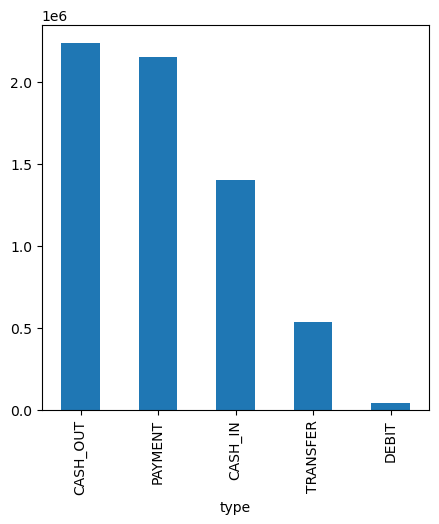

In [115]:
if __name__ == "__main__":
    visualization = Visualization(
        data_path="Fraud.csv",
        
    )

    print("**************************************")
    print("**********bar_graph*******************")
    visualization.bar_graph("type")

**************************************
**********plot_histogram**************


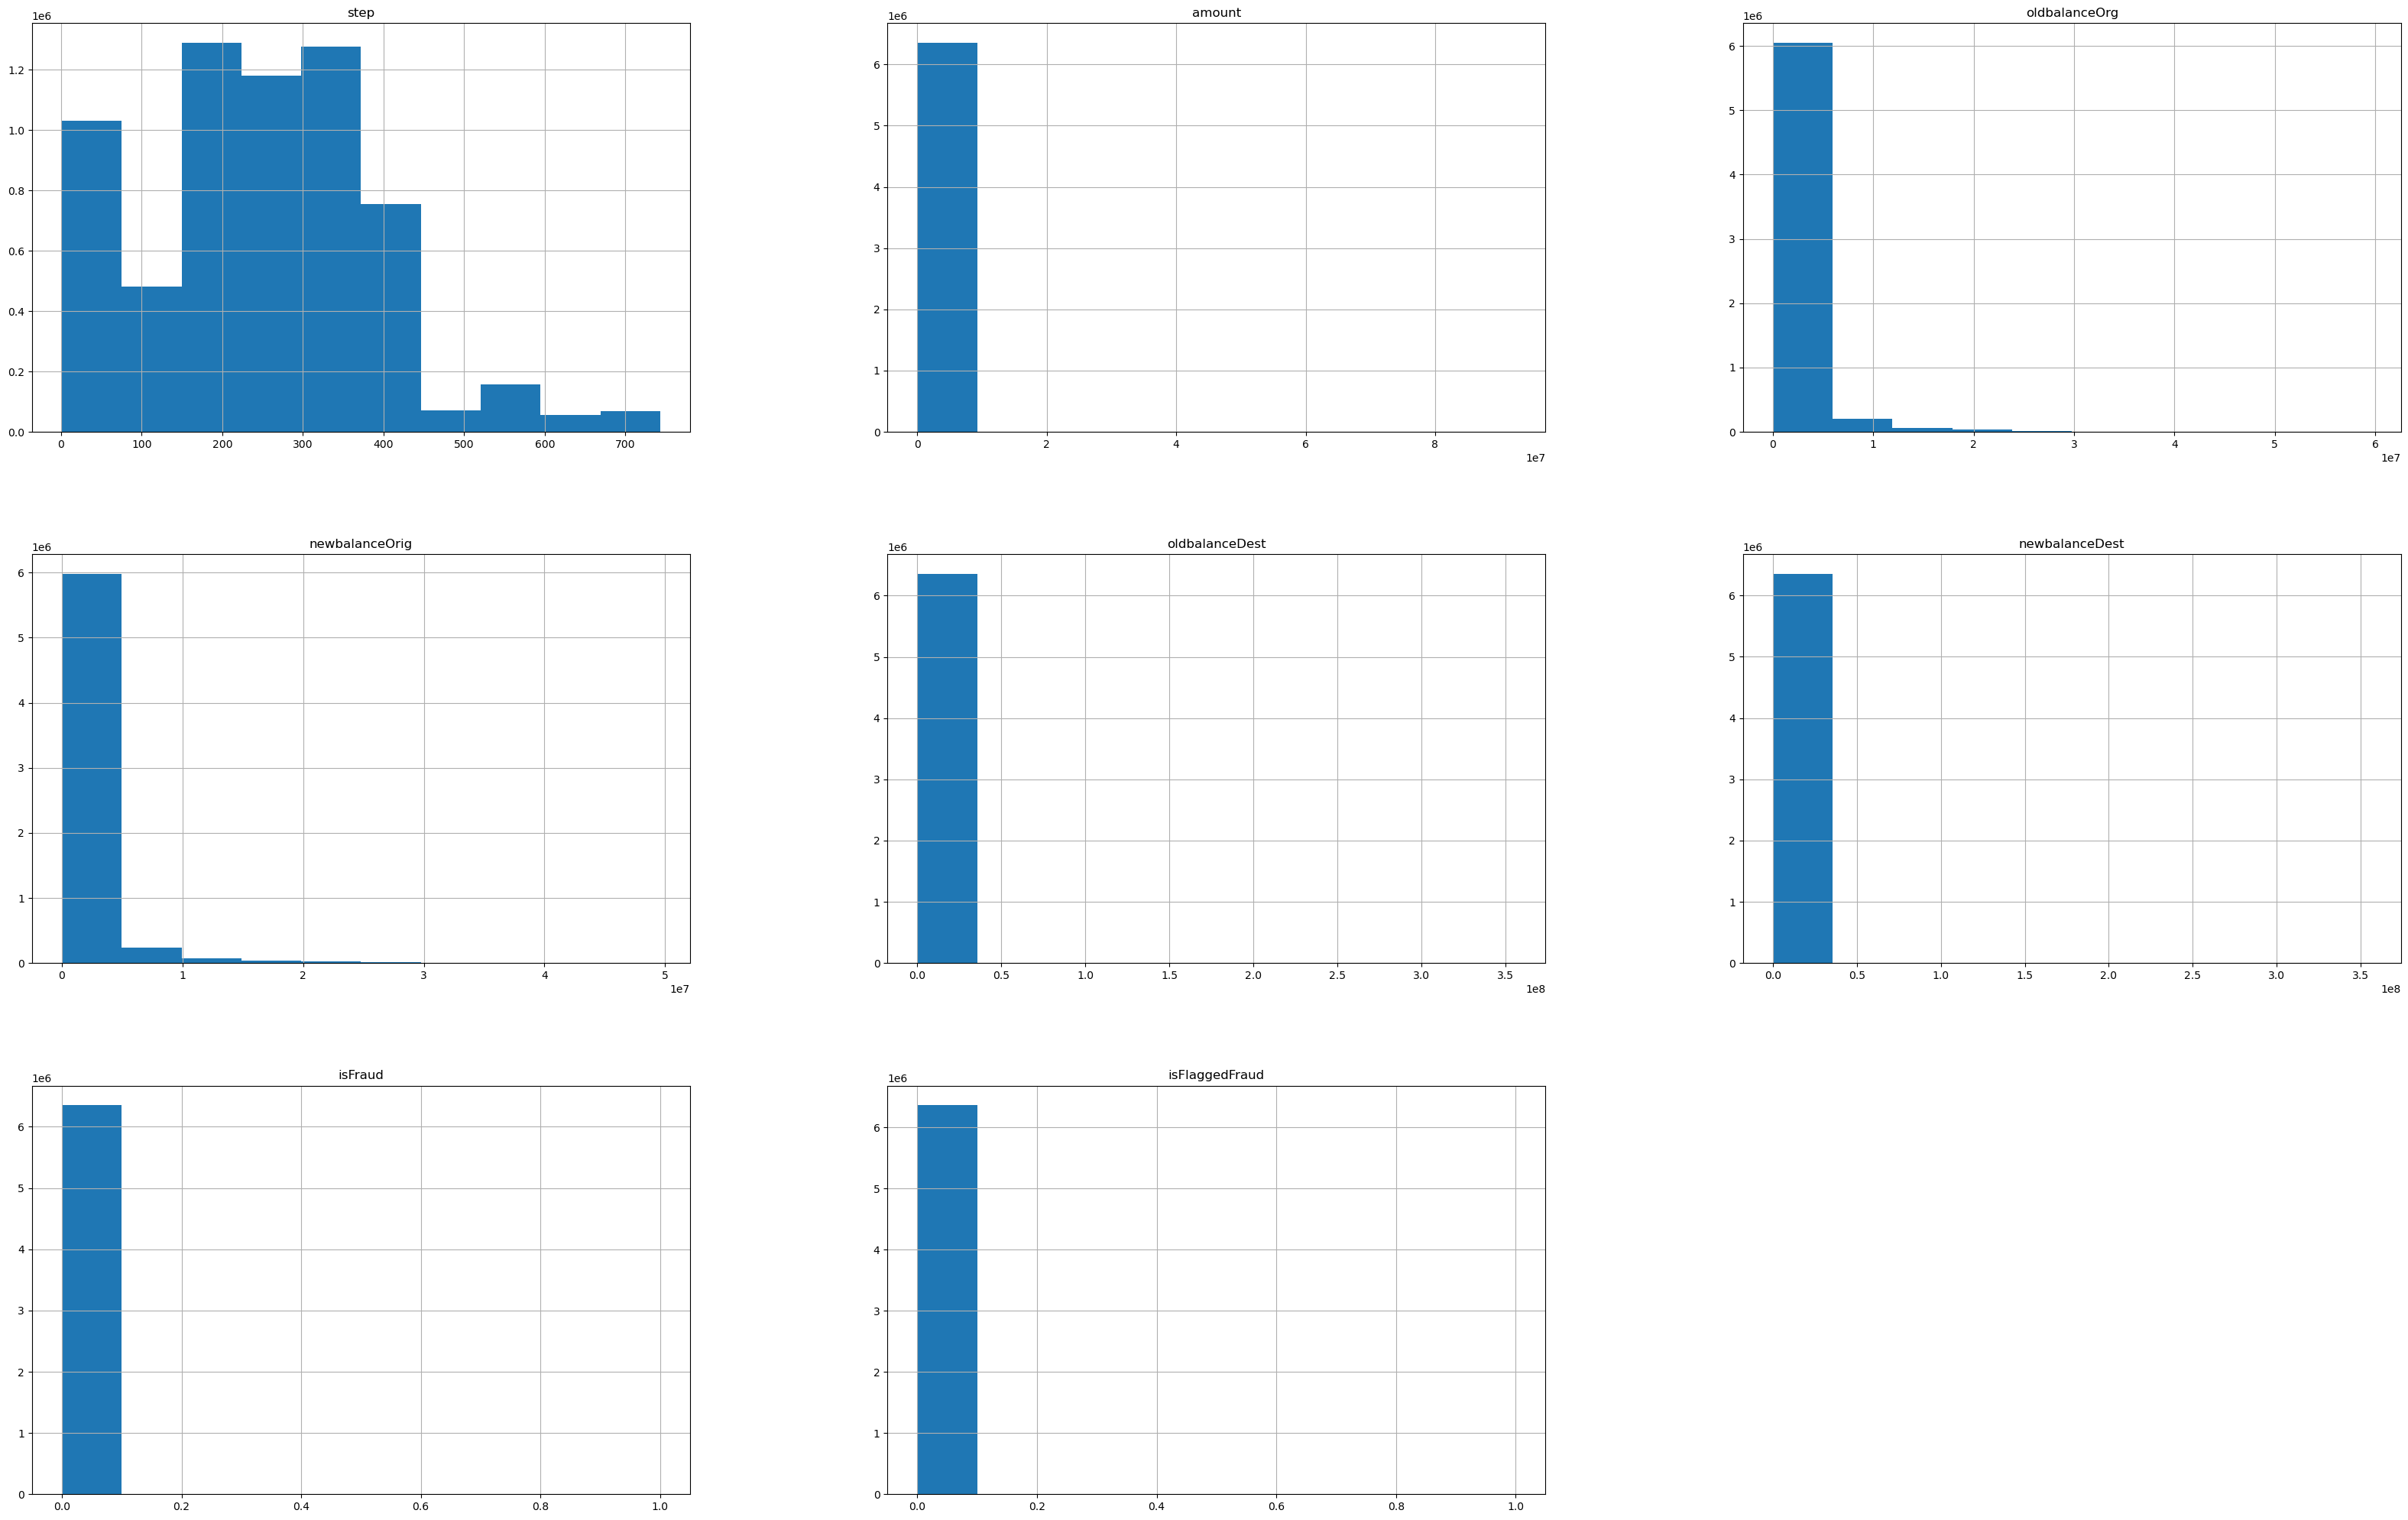

In [49]:
print("**************************************")
print("**********plot_histogram**************")
visualization.plot_histogram()

**************************************
**********plot_sns_bar****************


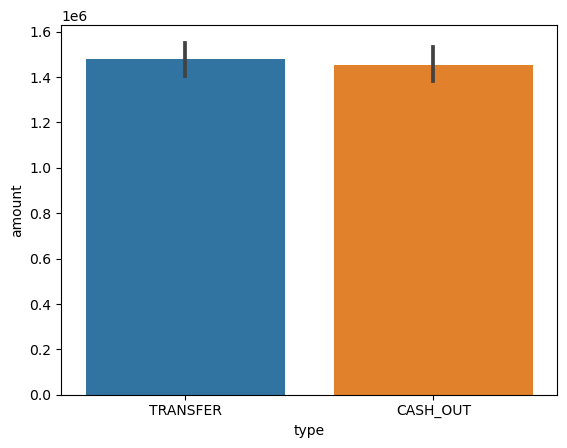

In [50]:
print("**************************************")
print("**********plot_sns_bar****************")
visualization.plot_sns_bar(x='type', y='amount', data_filter=("isFraud", 1))

**************************************
**********pie_chart********************


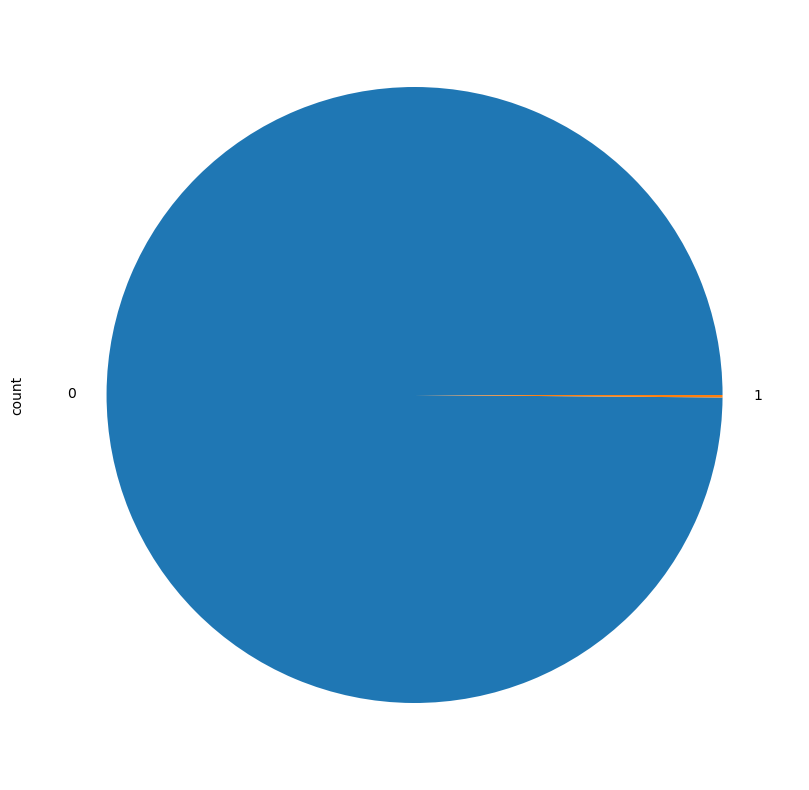

In [51]:
print("**************************************")
print("**********pie_chart********************")
visualization.pie_chart("isFraud")

In [52]:

    print("**************************************")
    print("**********describe_column*************")
    print("Description of nameDest:")
    print(visualization.describe_column("nameDest"))

    print("Description of type:")
    print(visualization.describe_column("type"))

    print("Description of nameOrig:")
    print(visualization.describe_column("nameOrig"))

**************************************
**********describe_column*************
Description of nameDest:
count         6362620
unique        2722362
top       C1286084959
freq              113
Name: nameDest, dtype: object
Description of type:
count      6362620
unique           5
top       CASH_OUT
freq       2237500
Name: type, dtype: object
Description of nameOrig:
count         6362620
unique        6353307
top       C1902386530
freq                3
Name: nameOrig, dtype: object


### nameOrig > nameDest which indicate that the people who are initiating the payment is greater than who are recieving which indicate income inequality

### cash out seems to be the most frequent type of transaction methods

### The current method of flagging fruad needs to be improved because the number of isfalgged fruad is quite low compared to is fruad

#### cash out and transfer consitute most amount frauded by this methods

### every variable except step is highly right skewed

### since the values don't add up and are not equal there seems to be a transaction charge |

### according to the descripition of the data set if the recipient is a merchant the account balance to them before and after the transaction is zero

### checking if the amount matches with the account balance for the customer who initiated the transaction

# shows high correlation
## 1 oldbalaceorig and newbalanceorig 2 old balancedest and newbalancedest    
as expected since the new balnce is just the amount + oldbalance these seem to show high correlation this can be avoided by feature engineering


In [53]:
print("**************************************")
print("**********extract_and_display_categorical_columns**")
visualization.extract_and_display_categorical_columns()

**************************************
**********extract_and_display_categorical_columns**
      nameDest      type     nameOrig
0  M1979787155   PAYMENT  C1231006815
1  M2044282225   PAYMENT  C1666544295
2   C553264065  TRANSFER  C1305486145


**************************************
**********displot*********************


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


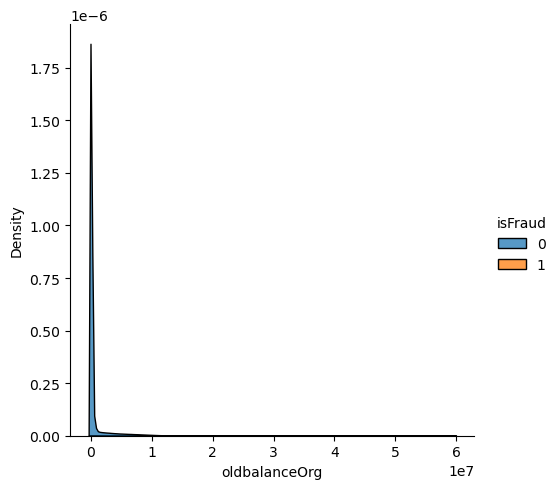

**************************************
**********skew_analysis***************
step               0.375177
amount            30.993949
oldbalanceOrg      5.249136
newbalanceOrig     5.176884
oldbalanceDest    19.921758
newbalanceDest    19.352302
dtype: float64


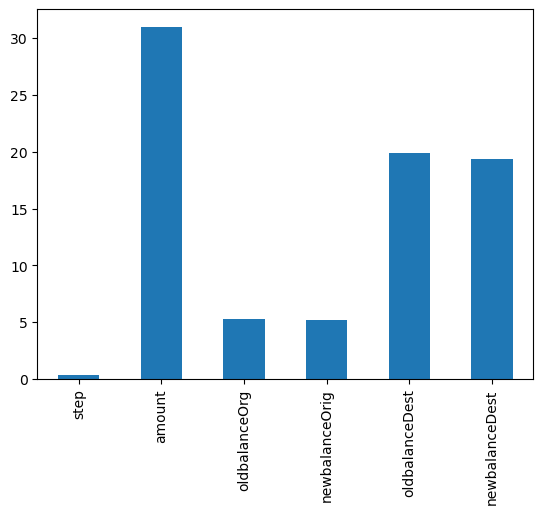

In [68]:
print("**************************************")
print("**********displot*********************")
visualization.displot("oldbalanceOrg", hue="isFraud", kind="kde", multiple="stack")
print("**************************************")
print("**********skew_analysis***************")
visualization.skew_analysis()

**************************************
**********plot_correlation_heatmap***


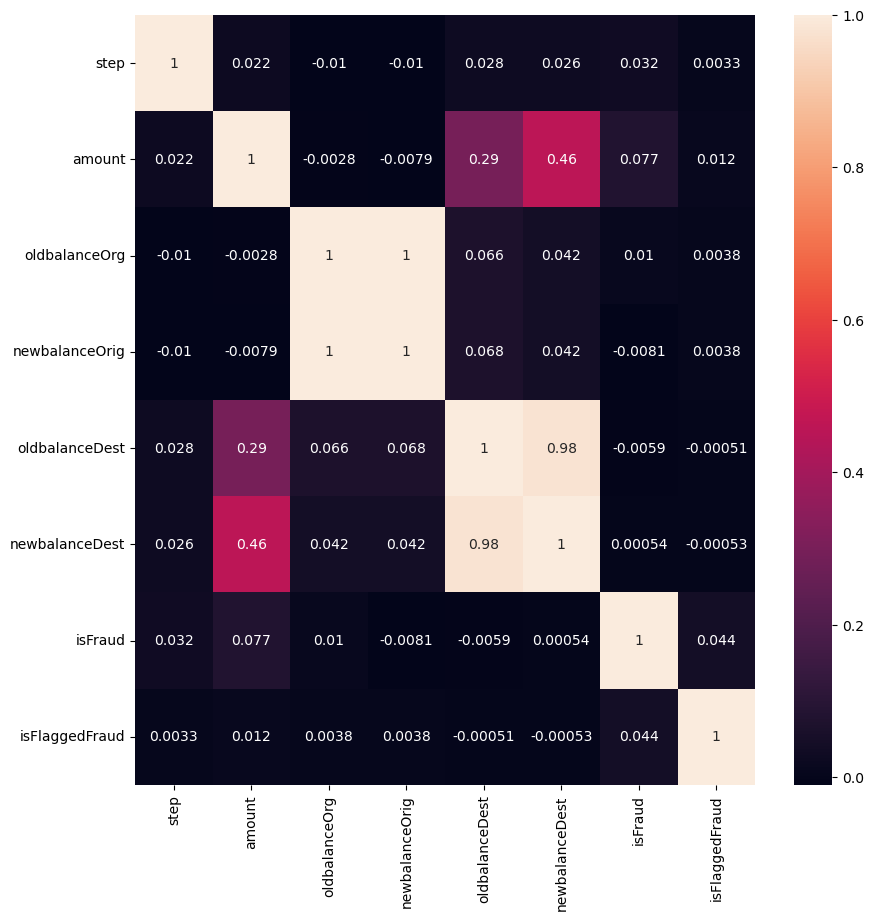

In [75]:
print("**************************************")
print("**********plot_correlation_heatmap***")
visualization.plot_correlation_heatmap()

In [81]:
print("**************************************")
print("**********filter_cat1*****************")
filtered_cat1 = visualization.filter_cat1()
if filtered_cat1 is not None:
    print(filtered_cat1)
else:
    print("No filtered data available.")

**************************************
**********filter_cat1*****************
         step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155

In [85]:
print("**************************************")
print("**********filter_cat1_condition******")
filtered_cat1 = visualization.filter_cat1_condition()
if filtered_cat1 is not None:
    print(filtered_cat1)
else:
    print("No filtered data available.")

**************************************
**********filter_cat1_condition******
         step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155 

In [92]:
print("**************************************")
print("**********filter_cat1_condition******")
filtered_cat1 = visualization.filter_cat1_condition()
if filtered_cat1 is not None:
    print(filtered_cat1)
else:
    print("No filtered data available.")

**************************************
**********filter_cat1_condition******
         step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155 

In [40]:
cat1.head(10)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,tran
0,1,9839.64,170136.00,160296.36,0.0,0.00,1.455192e-11
1,1,1864.28,21249.00,19384.72,0.0,0.00,-1.136868e-12
2,1,181.00,181.00,0.00,0.0,0.00,0.000000e+00
3,1,181.00,181.00,0.00,21182.0,0.00,0.000000e+00
4,1,11668.14,41554.00,29885.86,0.0,0.00,0.000000e+00
5,1,7817.71,53860.00,46042.29,0.0,0.00,-9.094947e-13
6,1,7107.77,183195.00,176087.23,0.0,0.00,-1.091394e-11
7,1,7861.64,176087.23,168225.59,0.0,0.00,1.364242e-11
8,1,4024.36,2671.00,0.00,0.0,0.00,-1.353360e+03
9,1,5337.77,41720.00,36382.23,41898.0,40348.79,-3.637979e-12


In [41]:
7817.71 - (53860.00 - 46042.29)

9.094947017729282e-13

#### both transaction charge and the amount clearly show a linear relation 

#### details of the comapny

In [102]:
    print("**************************************")
    print("**********Calculate Revenue************")
    revenue = visualization.calculate_revenue()
    if revenue is not None:
        print(f"Total Revenue: {revenue}")

    print("**************************************")
    print("**********Calculate Fraudulent Transactions************")
    fraudulent_transactions = visualization.calculate_fraudulent_transactions()
    if fraudulent_transactions is not None:
        print(f"Total Fraudulent Transactions: {fraudulent_transactions}")

    print("**************************************")
    print("**********Calculate Profit************")
    profit = visualization.calculate_profit()
    if profit is not None:
        print(f"Total Profit: {profit}")

**************************************
**********Calculate Revenue************
Total Revenue: 1279474959084.858
**************************************
**********Calculate Fraudulent Transactions************
Total Fraudulent Transactions: 11978629864.15
**************************************
**********Calculate Profit************
Total Profit: 1267496329220.708


#### 1279474959084.858 is the revenue of the company and 11978629864.15 is the amount lost due to fruad and 1267496329220.708 is the profit 

In [106]:
print("**************************************")
print("**********Count Merchants*************")
visualization.count_merchant(column_name="nameOrig")
visualization.count_merchant(column_name="nameDest")

**************************************
**********Count Merchants*************
Count of entries in column 'nameOrig' starting with 'M': 0
Count of entries in column 'nameDest' starting with 'M': 2151495


#### the person who ever initiated the transaction(sender) his nameOrig and account history is always shown and also he coont be a merchant only reciever can be a merchant

#### checking if indeed all the merchant transaction history is indeed not shown

In [111]:
print("**************************************")
print("**********Count Special Merchants*****")
visualization.count_special_merchants(column1="nameDest", column2="newbalanceDest")

**************************************
**********Count Special Merchants*****
Count of special merchants: 0


yes every merchant transaction is marked as zero

### checking to convert the nameOrig and nameDest to clusters they might contain information about the branch of bank or device the coustomer used for transaction

In [116]:
print("**************************************")
print("******Preprocess Name Columns*********")
no1, nd1 = visualization.preprocess_name_columns()
if no1 is not None and nd1 is not None:
    print("Processed 'nameOrig' data:", no1[:10])  # Example: Print the first 10 entries
    print("Processed 'nameDest' data:", nd1[:10])
    

**************************************
******Preprocess Name Columns*********
Processed 'nameOrig' data: [12310068150, 16665442950, 13054861450, 8400836710, 20485377200, 900456380, 1549888990, 19128504310, 12650129280, 7124101240]
Processed 'nameDest' data: [19797871551, 20442822251, 5532640650, 389970100, 12307017031, 5734872741, 4080691191, 6333263331, 11769321041, 1956008600]


In [118]:
cldf = pd.DataFrame(
    {'nameorig': no1,
     'namedest': nd1,
    })
cldf

,nameorig,namedest
0,12310068150,19797871551
1,16665442950,20442822251
2,13054861450,5532640650
3,8400836710,389970100
4,20485377200,12307017031
...,...,...
6362615,7864844250,7769192900
6362616,15290082450,18818418310
6362617,11629223330,13651258900
6362618,16859950370,20803885130
